## 1. Загрузка и первичный анализ данных

#### 1. Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Загрузка данных

In [3]:
df = pd.read_csv('../data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##### Информация об атрибутах
1. Age: возраст пациента [лет]
2. Sex: пол пациента [M: мужской, F: женский]
3. ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинозная боль, ASY: бессимптомная]
4. RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]
5. Cholesterol: сывороточный холестерин [мм/дл]
6. FastingBS: уровень сахара в крови натощак [1: если натощак BS > 120 мг/дл, 0: в противном случае]
7. RestingECG: результаты электрокардиограммы в состоянии покоя [Normal: норма, ST: с аномалией ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), LVH: показывает вероятную или определенную гипертрофию левого желудочка по критериям Эстеса]
8. MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
9. ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]
10. Oldpeak: oldpeak = ST [Числовое значение, измеренное при депрессии]
11. ST_Slope: наклон пикового сегмента ST при физической нагрузке [Up: восходящий, Flat: плоский, Down: нисходящий]
12. HeartDisease: выходной класс [1: заболевание сердца, 0: нормальный]

#### 3. Общая информация о данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### 4. Статистика по числовым признакам

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### 5. Количество классов

In [6]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

#### 6. Проверка на пропущенные значения

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### 7. Быстрый анализ категориальных признаков

In [12]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [13]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [14]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

#### 8. Построение корреляционной матрицы

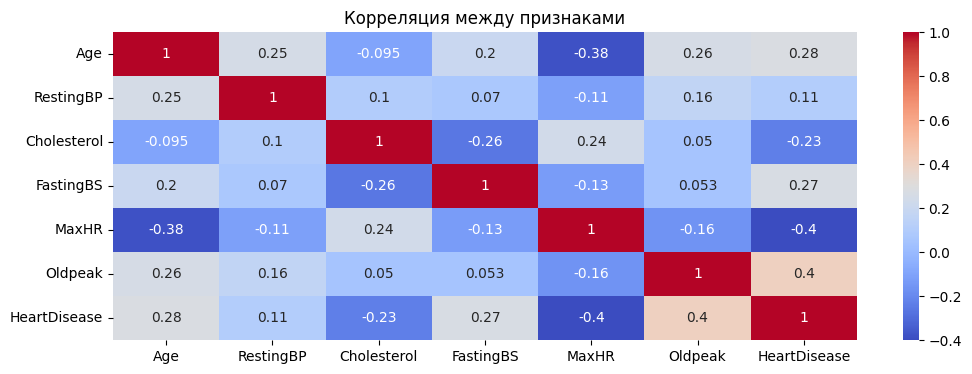

In [17]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляция между признаками")
plt.show()

In [22]:
df.corr(numeric_only=True)["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

#### 9. Распределение

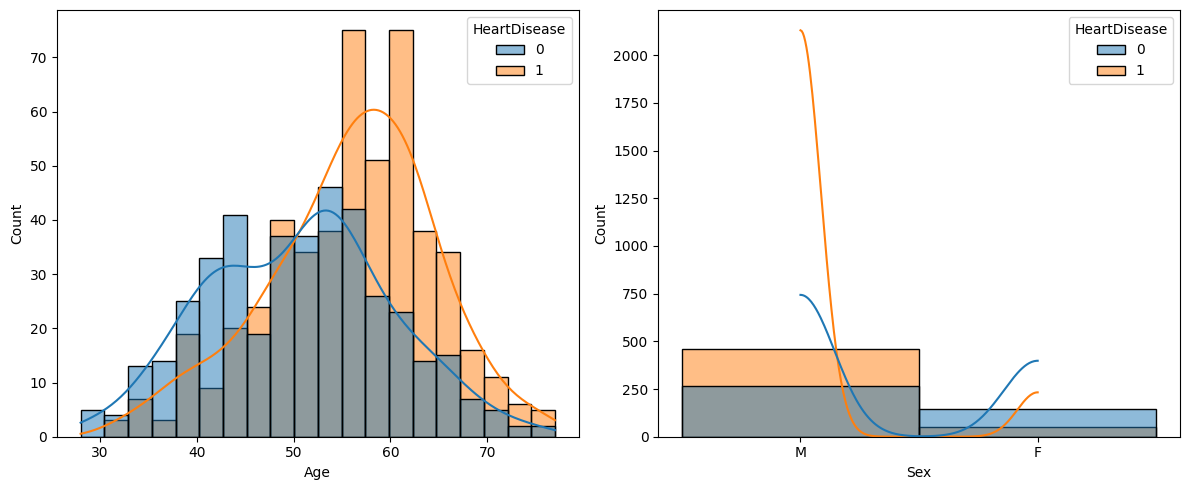

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue="HeartDisease", bins=20, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Sex', hue="HeartDisease", bins=20, kde=True)

plt.tight_layout()
plt.show()

### Выводы:
#### Исследование целевой прееменной
- Всего наблюдений: 918
- Класс 1 (риск): 508 (~55%)
- Класс 2 (без риска): 410 (~45%)
- Классы сбалансированы - модель не будет старадать от перекоса

#### Корреляция с HeartDisease (первые признаки)

- Oldepeak (0.40) - умеренно положительная связь с болезнью
- FastingBS (0.26) - высокий уровень сахара связан с риском
- MaxHR (-0.40) - низкий максимальный пульс связан с риском
- Age (0.28) - пожилой возраст связан с риском
- Сholesterol (-0.23) - холестерин связан с риском

Эти признаки могут оказаться важными для модели